In [2]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

In [9]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import KFold
import ast

datasets1 = []
for i in range(1, 11):
    df = pd.read_csv(f'../train/{i:05d}/train_stage1.csv')
    df.fillna(0, inplace=True)
    print(type(df['target_vector']))
    df['target_vector'] = df['target_vector'].apply(ast.literal_eval) 
    
    # target_vector max to 1 other to 0
    def set_max_to_one(target_list):
        max_value = max(target_list)
        return [1 if value == max_value else 0 for value in target_list]
    
    target_df = pd.DataFrame(df['target_vector'].apply(set_max_to_one).tolist(), index=df.index)
    # print(target_df)
    features_df = df.drop(columns=['start', 'end','target_vector'])
    datasets1.append((features_df, target_df))
kf = KFold(n_splits=5, shuffle=True, random_state=43)


brier_scores1 = []
model_importance1 = []
counter1 = 1

for train_index, test_index in kf.split(datasets1):

    X_train = pd.concat([datasets1[i][0] for i in train_index], ignore_index=True)
    y_train = pd.concat([datasets1[i][1] for i in train_index], ignore_index=True)
    

    X_test = pd.concat([datasets1[i][0] for i in test_index], ignore_index=True)
    y_test = pd.concat([datasets1[i][1] for i in test_index], ignore_index=True)

    # print(y_train)
    

#     model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
#     model.fit(X_train, y_train)

#     model_importance1.append(estimator.feature_importances_ for estimator in model.estimators_)
    

#     y_prob = model.predict_proba(X_test)
#     brier_score = np.mean([brier_score_loss(y_test.iloc[:, c], y_prob[c][:, 1], pos_label=1) for c in range(y_test.shape[1])])
#     print(f'Fit {counter1}: brier score = {brier_score}.')
#     brier_scores1.append(brier_score)
#     counter1 += 1


# print(f'Stage1 Average score across all folds: {np.mean(brier_scores1)}')

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


### Stage 1

In [3]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import KFold
import ast

datasets1 = []
for i in range(1, 11):
    df = pd.read_csv(f'../train/{i:05d}/train_stage1.csv')
    df.fillna(0, inplace=True)
    df['target_vector'] = df['target_vector'].apply(ast.literal_eval) 
    
    # target_vector max to 1 other to 0
    def set_max_to_one(target_list):
        max_value = max(target_list)
        return [1 if value == max_value else 0 for value in target_list]
    
    target_df = pd.DataFrame(df['target_vector'].apply(set_max_to_one).tolist(), index=df.index)
    features_df = df.drop(columns=['start', 'end','target_vector'])
    datasets1.append((features_df, target_df))
kf = KFold(n_splits=5, shuffle=True, random_state=43)


brier_scores1 = []
model_importance1 = []
counter1 = 1

for train_index, test_index in kf.split(datasets1):

    X_train = pd.concat([datasets1[i][0] for i in train_index], ignore_index=True)
    y_train = pd.concat([datasets1[i][1] for i in train_index], ignore_index=True)
    

    X_test = pd.concat([datasets1[i][0] for i in test_index], ignore_index=True)
    y_test = pd.concat([datasets1[i][1] for i in test_index], ignore_index=True)
    

    model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
    model.fit(X_train, y_train)

    model_importance1.append(estimator.feature_importances_ for estimator in model.estimators_)
    

    y_prob = model.predict_proba(X_test)
    brier_score = np.mean([brier_score_loss(y_test.iloc[:, c], y_prob[c][:, 1], pos_label=1) for c in range(y_test.shape[1])])
    print(f'Fit {counter1}: brier score = {brier_score}.')
    brier_scores1.append(brier_score)
    counter1 += 1


print(f'Stage1 Average score across all folds: {np.mean(brier_scores1)}')

Fit 1: brier score = 0.03865627926832744.
Fit 2: brier score = 0.04640494708149729.
Fit 3: brier score = 0.041506785525166554.
Fit 4: brier score = 0.044391721979820206.
Fit 5: brier score = 0.038935657993074725.
Stage1 Average score across all folds: 0.04197907836957725


In [4]:
importance_df1 = pd.DataFrame()

features1 = ['location_idx', 'x_mean', 'y_mean', 'z_mean']

importance_df1['features'] = features1

counter = 1
for generator in model_importance1:
    for value in generator:
        col_name = 'value' + str(counter)
        importance_df1[col_name] = value
        counter += 1

importance_df1['mean'] = importance_df1.drop('features', axis=1).mean(axis=1)
importance_df1 = importance_df1.sort_values(by='mean')
importance_df1

C:\Users\citrus\AppData\Local\Temp\ipykernel_102088\2473867862.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  importance_df1[col_name] = value
C:\Users\citrus\AppData\Local\Temp\ipykernel_102088\2473867862.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  importance_df1['mean'] = importance_df1.drop('features', axis=1).mean(axis=1)


,features,value1,value2,value3,value4,value5,value6,value7,value8,value9,...,value92,value93,value94,value95,value96,value97,value98,value99,value100,mean
0,location_idx,0.130110,0.127136,0.033248,0.079499,0.121158,0.070383,0.069399,0.110426,0.114392,...,0.065815,0.056901,0.049454,0.044386,0.052792,0.064918,0.068226,0.064237,0.067290,0.077332
3,z_mean,0.292382,0.292641,0.270024,0.334055,0.287004,0.324421,0.312866,0.313697,0.283252,...,0.313159,0.309474,0.311073,0.305182,0.325058,0.313074,0.320972,0.312607,0.310721,0.303765
2,y_mean,0.296688,0.291437,0.315030,0.300186,0.290672,0.295049,0.312605,0.257299,0.288059,...,0.308756,0.317362,0.325515,0.326829,0.307506,0.316451,0.306722,0.307122,0.309832,0.308451
1,x_mean,0.280820,0.288786,0.381697,0.286260,0.301166,0.310147,0.305130,0.318579,0.314297,...,0.312270,0.316263,0.313958,0.323603,0.314644,0.305557,0.304080,0.316034,0.312157,0.310452


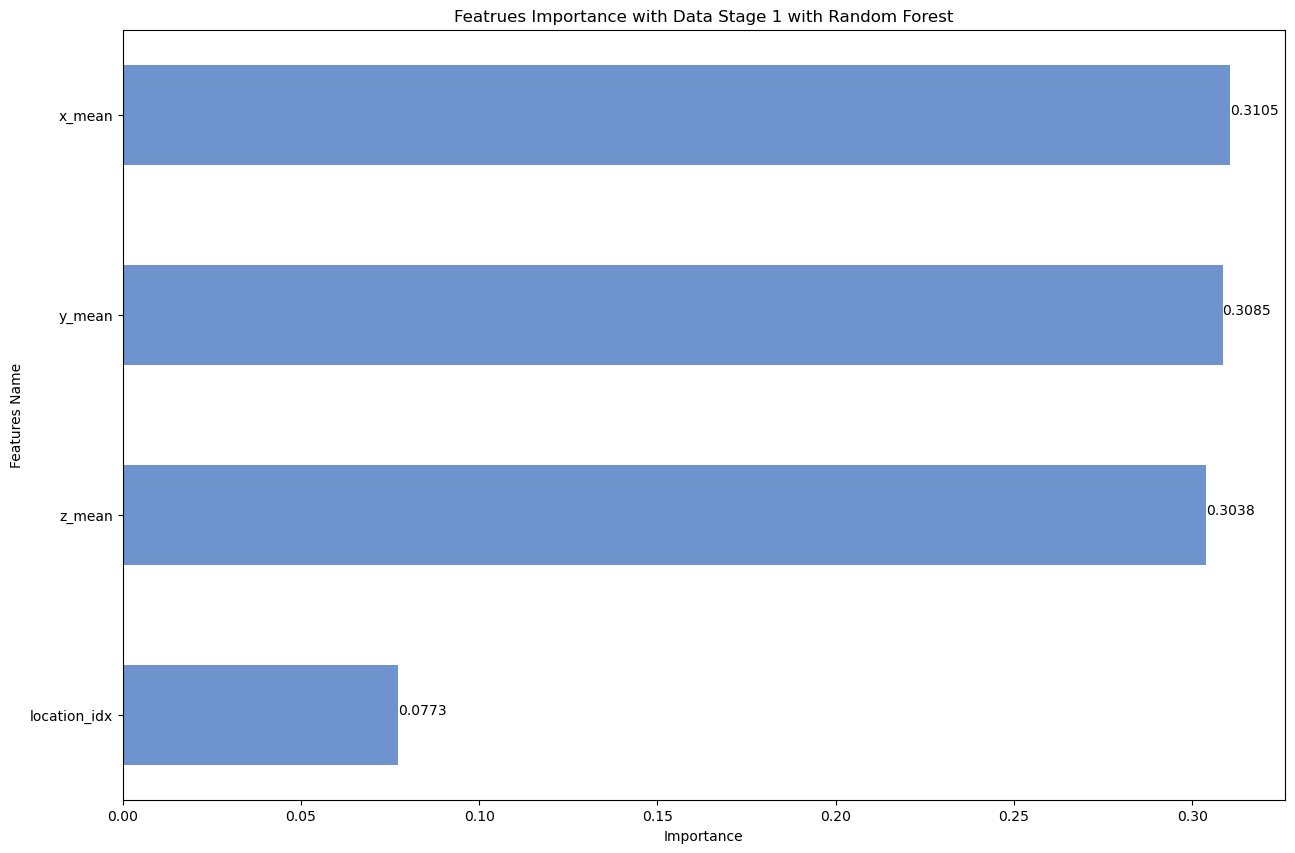

In [5]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

# colors = ['#253d8c', '#2e5276', '#c7ceda', '#8697a6']
# selfcmap = LinearSegmentedColormap.from_list('selfcmap',colors)

# norm = plt.Normalize(min(importance_df1['mean']), max(importance_df1['mean']))
# bar_colors = [selfcmap(norm(value)) for value in importance_df1['mean']]
fig, ax1 = plt.subplots(figsize=(15,10))

ax1.barh(importance_df1['features'], importance_df1['mean'], color='#6f94cd', height=0.5)
ax1.set_ylabel('Features Name')
ax1.set_xlabel('Importance')
ax1.set_title('Featrues Importance with Data Stage 1 with Random Forest')

for index, value in enumerate(importance_df1['mean']):
    ax1.text(value, index, str(round(value, ndigits=4)))

plt.show()

### Stage 2

In [8]:
datasets2 = []
for i in range(1, 11):
    df = pd.read_csv(f'../train/{i:05d}/train_stage2.csv')
    df.fillna(0, inplace=True)
    df['target_vector'] = df['target_vector'].apply(ast.literal_eval) 
    
    # target_vector max to 1 other to 0
    def set_max_to_one(target_list):
        max_value = max(target_list)
        return [1 if value == max_value else 0 for value in target_list]
    
    target_df = pd.DataFrame(df['target_vector'].apply(set_max_to_one).tolist(), index=df.index)
    features_df = df.drop(columns=['target_vector'])
    datasets2.append((features_df, target_df))
kf = KFold(n_splits=5, shuffle=True, random_state=42)


brier_scores2 = []
model_importance2 = []
counter2 = 1

for train_index, test_index in kf.split(datasets2):

    X_train = pd.concat([datasets2[i][0] for i in train_index], ignore_index=True)
    y_train = pd.concat([datasets2[i][1] for i in train_index], ignore_index=True)
    

    X_test = pd.concat([datasets2[i][0] for i in test_index], ignore_index=True)
    y_test = pd.concat([datasets2[i][1] for i in test_index], ignore_index=True)
    

    model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
    model.fit(X_train, y_train)

    model_importance2.append(estimator.feature_importances_ for estimator in model.estimators_)
    

    y_prob = model.predict_proba(X_test)
    brier_score = np.mean([brier_score_loss(y_test.iloc[:, c], y_prob[c][:, 1], pos_label=1) for c in range(y_test.shape[1])])
    print(f'Fit {counter2}: brier score = {brier_score}.')
    brier_scores2.append(brier_score)
    counter2 += 1


print(f'Stage2 Average score across all folds: {np.mean(brier_scores2)}')

Fit 1: brier score = 0.03249338286208887.
Fit 2: brier score = 0.030921564290260984.
Fit 3: brier score = 0.029678507697141053.
Fit 4: brier score = 0.026485778629963652.
Fit 5: brier score = 0.024732770789073898.
Stage2 Average score across all folds: 0.028862400853705693


In [13]:
importance_df2 = pd.DataFrame()

features2 = pd.read_csv('../train/00001/train_stage2.csv').drop('target_vector', axis=1).columns

importance_df2['features'] = features2

counter = 1
for generator in model_importance2:
    for value in generator:
        col_name = 'value' + str(counter)
        importance_df2[col_name] = value
        counter += 1

importance_df2['mean'] = importance_df2.drop('features', axis=1).mean(axis=1)
importance_df2 = importance_df2.sort_values(by='mean')
importance_df2

,features,value1,value2,value3,value4,value5,value6,value7,value8,value9,...,value90,value91,value92,value93,value94,value95,value96,value97,value98,mean
23,3d_shape_mean_depth,0.001589,0.000935,0.000431,0.000372,0.000636,0.001276,0.000947,0.000298,0.000869,...,0.000606,0.001020,0.000478,0.000297,0.000372,0.001018,0.000410,0.000765,0.000417,0.000897
19,2d_shape_std_width,0.004651,0.010909,0.010701,0.005312,0.006545,0.004386,0.003310,0.001501,0.005376,...,0.008004,0.007716,0.012401,0.012660,0.011100,0.009217,0.010661,0.008958,0.008161,0.007543
24,3d_shape_std_width,0.004925,0.012758,0.007569,0.005715,0.006080,0.005322,0.006303,0.001531,0.005532,...,0.006921,0.006967,0.015031,0.014311,0.011568,0.008757,0.011024,0.008012,0.009618,0.007849
20,2d_shape_std_height,0.014394,0.016387,0.009725,0.005771,0.006153,0.004289,0.005932,0.002763,0.006668,...,0.008031,0.008235,0.007587,0.006797,0.012731,0.008726,0.010938,0.011643,0.007373,0.008122
25,3d_shape_std_height,0.004361,0.021294,0.007948,0.005532,0.007022,0.005324,0.006728,0.001909,0.005248,...,0.011436,0.012266,0.011217,0.009439,0.011805,0.010010,0.014945,0.009094,0.008744,0.008898
9,2d_movement_std_x,0.008144,0.012391,0.027417,0.005399,0.006115,0.004403,0.006119,0.001664,0.010287,...,0.007927,0.009813,0.008158,0.008401,0.009772,0.006927,0.008538,0.009279,0.010627,0.008924
14,3d_movement_std_x,0.004433,0.009864,0.029082,0.005034,0.006713,0.004345,0.004831,0.001253,0.007515,...,0.007412,0.007394,0.008262,0.011061,0.009938,0.009811,0.011065,0.008806,0.010845,0.008933
15,3d_movement_std_y,0.015131,0.019327,0.012788,0.005748,0.007929,0.005840,0.009895,0.003561,0.010900,...,0.009207,0.012617,0.011223,0.008523,0.011625,0.010738,0.009520,0.008226,0.008271,0.009869
10,2d_movement_std_y,0.014709,0.023283,0.019030,0.006227,0.010773,0.006940,0.009090,0.002738,0.012846,...,0.008618,0.013476,0.010102,0.007786,0.009915,0.010583,0.012171,0.012996,0.007503,0.010303
6,Study_AP,0.002672,0.004984,0.008717,0.009718,0.018405,0.006438,0.012448,0.005299,0.006858,...,0.006136,0.009812,0.009607,0.005724,0.014746,0.014174,0.011165,0.009055,0.009495,0.010376


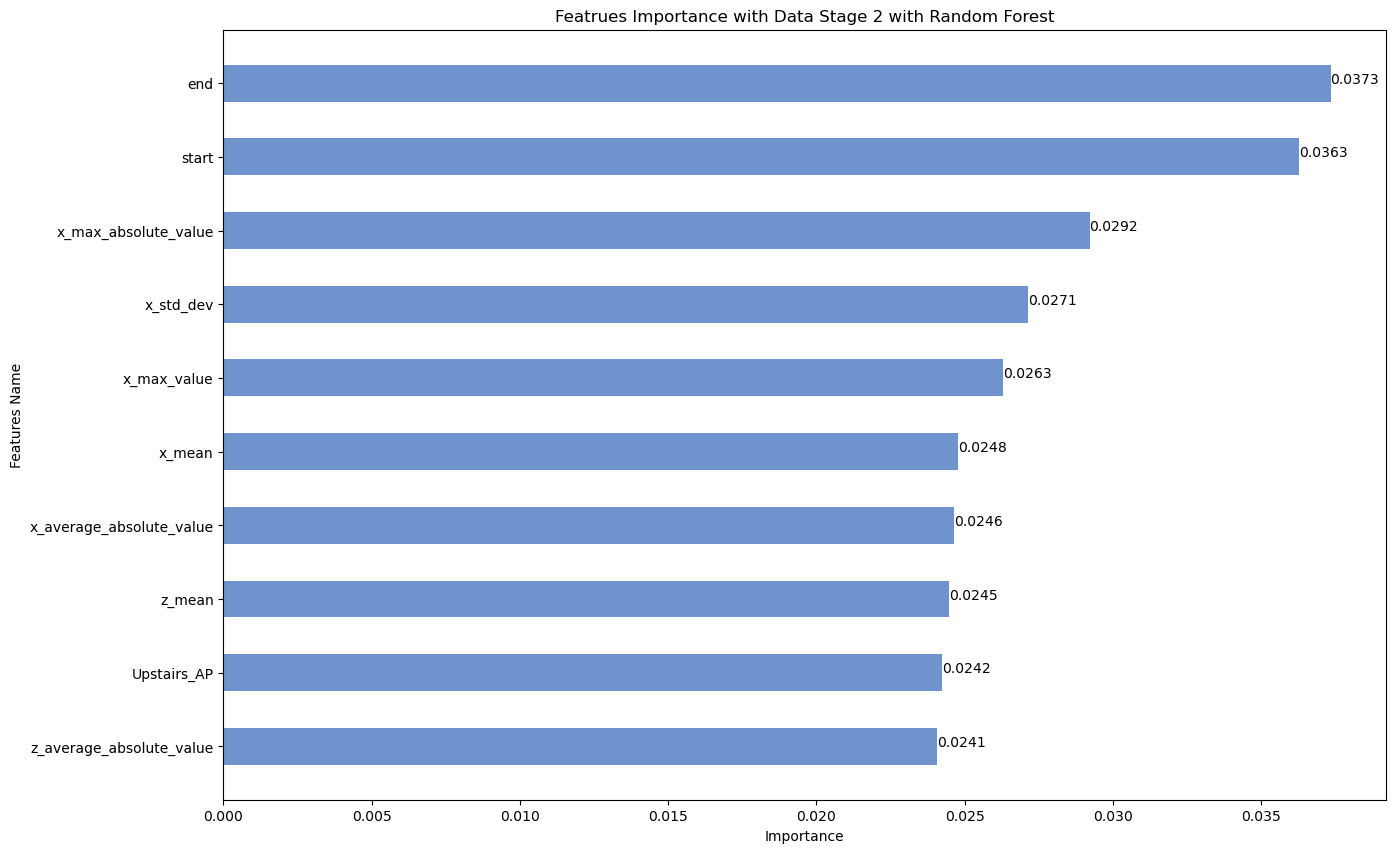

In [24]:
# colors = ['#253d8c', '#2e5276', '#c7ceda', '#8697a6']
# selfcmap = LinearSegmentedColormap.from_list('selfcmap',colors)

# norm = plt.Normalize(min(importance_df1['mean']), max(importance_df1['mean']))
# bar_colors = [selfcmap(norm(value)) for value in importance_df1['mean']]

fig, ax2 = plt.subplots(figsize=(15,10))

ax2.barh(importance_df2['features'].tail(10), importance_df2['mean'].tail(10), color='#6f94cd', height=0.5)
ax2.set_ylabel('Features Name')
ax2.set_xlabel('Importance')
ax2.set_title('Featrues Importance with Data Stage 2 with Random Forest')

for index, value in enumerate(importance_df2['mean'].tail(10)):
    ax2.text(value, index, str(round(value, ndigits=4)))

plt.show()

### Stage 3

In [32]:
datasets3 = []
for i in range(1, 11):
    df = pd.read_csv(f'../train/{i:05d}/train_stage3.csv')
    # df.fillna(0, inplace=True)
    df['target_vector'] = df['target_vector'].apply(ast.literal_eval) 
    
    # target_vector max to 1 other to 0
    def set_max_to_one(target_list):
        max_value = max(target_list)
        return [1 if value == max_value else 0 for value in target_list]
    
    target_df = pd.DataFrame(df['target_vector'].apply(set_max_to_one).tolist(), index=df.index)
    features_df = df.drop(columns=['target_vector'])
    datasets3.append((features_df, target_df))
kf = KFold(n_splits=5, shuffle=True, random_state=42)


brier_scores3 = []
model_importance3 = []
counter3 = 1

for train_index, test_index in kf.split(datasets3):

    X_train = pd.concat([datasets3[i][0] for i in train_index], ignore_index=True)
    y_train = pd.concat([datasets3[i][1] for i in train_index], ignore_index=True)
    

    X_test = pd.concat([datasets3[i][0] for i in test_index], ignore_index=True)
    y_test = pd.concat([datasets3[i][1] for i in test_index], ignore_index=True)
    

    model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
    model.fit(X_train, y_train)

    model_importance3.append(estimator.feature_importances_ for estimator in model.estimators_)
    

    y_prob = model.predict_proba(X_test)
    brier_score = np.mean([brier_score_loss(y_test.iloc[:, c], y_prob[c][:, 1], pos_label=1) for c in range(y_test.shape[1])])
    print(f'Fit {counter3}: brier score = {brier_score}.')
    brier_scores3.append(brier_score)
    counter3 += 1


print(f'Stage3 Average score across all folds: {np.mean(brier_scores3)}')

Fit 1: brier score = 0.03352585545297172.
Fit 2: brier score = 0.030978308402291533.
Fit 3: brier score = 0.02935145303173108.
Fit 4: brier score = 0.028532182818709877.
Fit 5: brier score = 0.026258372781065086.
Stage3 Average score across all folds: 0.029729234497353856


In [33]:
importance_df3 = pd.DataFrame()

features3 = pd.read_csv('../train/00001/train_stage3.csv').drop('target_vector', axis=1).columns

importance_df3['features'] = features3

counter = 1
for generator in model_importance3:
    for value in generator:
        col_name = 'value' + str(counter)
        importance_df3[col_name] = value
        counter += 1

importance_df3['mean'] = importance_df3.drop('features', axis=1).mean(axis=1)
importance_df3 = importance_df3.sort_values(by='mean')
importance_df3

C:\Users\citrus\AppData\Local\Temp\ipykernel_90360\3256935219.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  importance_df3[col_name] = value
C:\Users\citrus\AppData\Local\Temp\ipykernel_90360\3256935219.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  importance_df3['mean'] = importance_df3.drop('features', axis=1).mean(axis=1)


,features,value1,value2,value3,value4,value5,value6,value7,value8,value9,...,value92,value93,value94,value95,value96,value97,value98,value99,value100,mean
19,2d_shape_std_width,0.003349,0.006234,0.005944,0.014195,0.010964,0.005188,0.004992,0.006791,0.003118,...,0.007198,0.008486,0.011883,0.012162,0.010514,0.007743,0.010073,0.010562,0.007826,0.007671
23,3d_shape_std_width,0.002682,0.004453,0.006506,0.012990,0.007491,0.006152,0.005486,0.007033,0.005450,...,0.007546,0.009171,0.017204,0.012977,0.011739,0.008918,0.009366,0.008888,0.009525,0.007803
14,3d_movement_std_x,0.003163,0.003283,0.004219,0.013842,0.026180,0.005168,0.005463,0.004800,0.003826,...,0.008937,0.007694,0.006959,0.010952,0.010646,0.006758,0.009762,0.007733,0.011392,0.008788
20,2d_shape_std_height,0.005229,0.006576,0.018205,0.018026,0.009381,0.006024,0.005547,0.004710,0.006385,...,0.009364,0.010226,0.007916,0.008017,0.013264,0.008242,0.015108,0.011887,0.007219,0.008927
24,3d_shape_std_height,0.005888,0.010010,0.007758,0.013969,0.010584,0.006090,0.006892,0.004025,0.006910,...,0.009204,0.009990,0.010425,0.008405,0.010391,0.011358,0.013809,0.009457,0.008488,0.008987
9,2d_movement_std_x,0.004332,0.009547,0.006983,0.013533,0.029706,0.005277,0.006163,0.004964,0.006786,...,0.009427,0.006589,0.007153,0.010496,0.010524,0.007400,0.008574,0.007805,0.010371,0.009061
15,3d_movement_std_y,0.006349,0.010705,0.011433,0.016742,0.014219,0.006028,0.009197,0.006888,0.010350,...,0.008298,0.012863,0.008118,0.007653,0.013332,0.012124,0.013658,0.009521,0.008122,0.010047
10,2d_movement_std_y,0.004238,0.009888,0.017313,0.015524,0.017195,0.005077,0.008141,0.008052,0.009822,...,0.009671,0.012776,0.008111,0.007333,0.010185,0.009655,0.010522,0.010309,0.007322,0.010410
6,Study_AP,0.017382,0.011511,0.003896,0.005193,0.008813,0.008400,0.014985,0.007564,0.012425,...,0.007648,0.014328,0.008123,0.006235,0.013918,0.014932,0.010635,0.008235,0.008153,0.010425
17,2d_shape_mean_width,0.005938,0.012646,0.015436,0.010502,0.006811,0.008291,0.007051,0.020407,0.017723,...,0.013307,0.009353,0.010892,0.015357,0.008983,0.006790,0.012797,0.008616,0.013004,0.011159


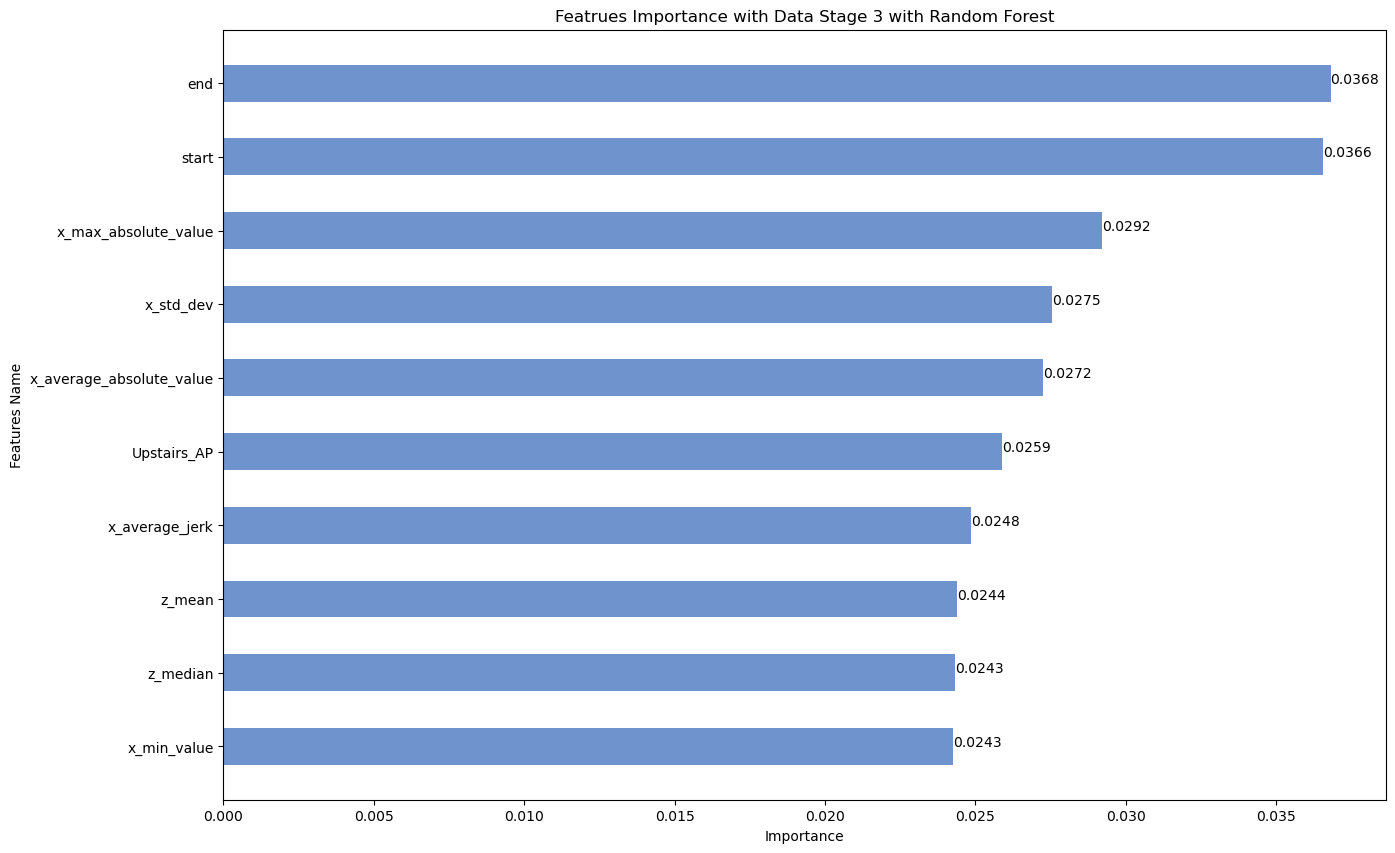

In [34]:
fig, ax3 = plt.subplots(figsize=(15,10))

ax3.barh(importance_df3['features'].tail(10), importance_df3['mean'].tail(10), color='#6f94cd', height=0.5)
ax3.set_ylabel('Features Name')
ax3.set_xlabel('Importance')
ax3.set_title('Featrues Importance with Data Stage 3 with Random Forest')

for index, value in enumerate(importance_df3['mean'].tail(10)):
    ax3.text(value, index, str(round(value, ndigits=4)))

plt.show()